# MOW 323 - Simulation-based design 

# Beam Elements - Dynamic analysis


The beam elements used in this code have the following properties: 

- Two nodes
- Each node has three-degrees-of-freedom
  * Axial displacement/Load 
  * Transverse displacement/Load 
  * Angular displacement(rotation)/Moment
This means that each element has six degrees-of-freedom. 


In [5]:
import importlib; 
try:
    import engmod.structfem as sfem; importlib.reload(sfem)
except:
    try:
        import add_engmod
        import engmod.structfem as sfem; #importlib.reload(sfem)    
        print("EngMod Development Mode Activated. Not applicable/relevant to students.")        
    except Exception as e:
        print(e)
        print("Engmod is not located in the correct folder. ")

import numpy as np 
import matplotlib.pyplot as plt 

# This warning will also appear for future versions. Comment the line out once you have downloaded and successfully tested the 2021-10-18 version

In [7]:
print(sfem.__version__)
assert sfem.__version__ == '2021-10-25',"Please download the latest version of engmod on clickUP."

2021-10-25


# Example 1 - Simply supported beam

In [8]:
# The total length of the beam. 
L_beam = 1 
# The Young's modulus in Pa
E = 200E9
# The height of the beam in metres
h = 30/1E3
# The width of the beam in metres
b = 10/1E3
# The area moment of inertia:
I = 1/12 * b * h**3
# The cross-sectional area
A = h * b
# The density (only important for dynamic analyses)
rho = 7800
# The force applied to the structure. 
F = 1000

In [9]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = None

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

print(prescribed_forces)
fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


None
*** WARNING: There are no forces applied to the system. Only a modal analysis can be performed. ***


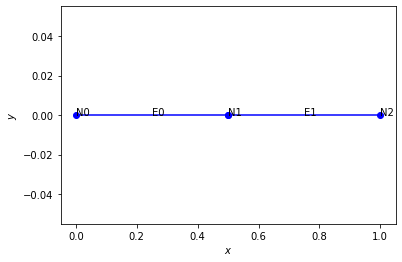

In [10]:
fmn.plot_system()


The natural frequencies

In [11]:
fmn.eigen()

{'natural_frequencies_hz': array([  69.15585371,  305.82224648,  768.70936229, 1401.45359367,
        2791.76238302]),
 'modes': array([[ 2.92683529e+00, -7.16114874e+00, -1.54138730e+01,
          1.89466187e+01,  1.54677412e-15],
        [-8.70525388e-18,  4.44679491e-17,  8.64456326e-18,
          1.52300572e-16, -1.13227703e+00],
        [ 9.31859902e-01, -5.85938879e-15,  8.42345768e-01,
          2.56148144e-16, -1.39054876e-17],
        [ 4.34593494e-14,  7.16114874e+00, -9.05403113e-15,
          1.89466187e+01,  1.94185127e-15],
        [-2.92683529e+00, -7.16114874e+00,  1.54138730e+01,
          1.89466187e+01,  4.63070148e-15]]),
 'coor_global': array([0. , 0.5, 1. , 0. , 0. , 0. ]),
 'index_p': array([0, 1, 6, 7]),
 'index_f': array([2, 3, 4, 5, 8])}

Plot the modes and showing the corresponding natural frequencies:

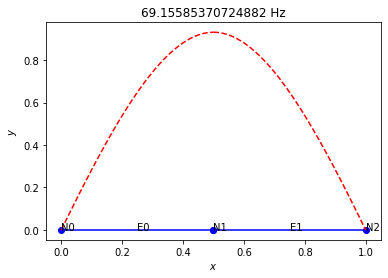

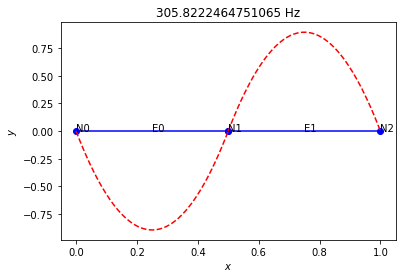

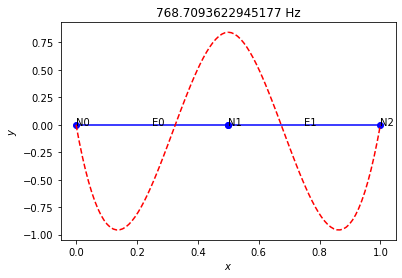

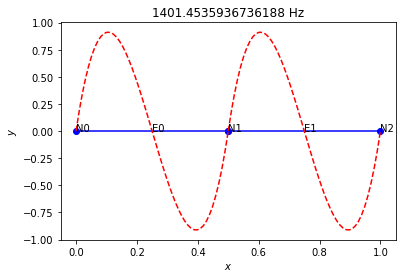

In [12]:
fmn.plot_modes(npoints=50,number_of_modes=4)

## Dynamic bending moment calculation

## Step 1: Obtain the stiffness and mass matrix associated with f-dof

In [64]:
Mff,Kff = fmn.dynamic_make_matrices()

# Step 2: Generate $\mathbf{f}_{f}(t) = \mathbf{f}_{ss,f} \cos(\omega \cdot t)$ 

### 2.1 Excitation frequency $\omega$ in rad/s

```python

Signature: fmn1.make_force_global(node, direction, force_magnitude)
Docstring:
inputs
-------

node: integer
    The node where the foce will be applied.

direction: integer
    The direction in which the force will be applied.

force_magnitude: integer
    The magnitude of the force.

Returns
---------

F: array_like
    The global force array that has the same dimensions as the global degrees-of-freedom of the structure

Ff: array_like
    The force associated with the free degrees-of-freedom. This is used in dynamic analyses.

Fp: array_like
    The force associated with prescribed degrees-of-freedom. This contains the reaction forces.
File:      c:\university\courses\educode\engmod\structfem.py
Type:      method


```

In [65]:
# Assume that only the load is applied to the structure (th)
_,Fss,_ = fmn.make_force_global(1,1,1000)

Fss

array([   0.,    0., 1000.,    0.,    0.])

### 2.2 Excitation frequency $\omega$ in rad/s

In [92]:
w = 20 * 2 * np.pi # rad/s

# Step 3 - Obtain the amplitudes associated with the particular solution

$$
\mathbf{u}_{p}(t) = \mathbf{u}_{s} \cdot e^{i \cdot \omega \cdot t}
$$
where 
$$
\mathbf{u}_{s} = (\mathbf{K} - \omega^2 \mathbf{M}) \mathbf{f}_{ss}
$$



In [82]:
import scipy.linalg as scilin

D,V = scilin.eigh(Kff,Mff)
np.sqrt(D)/(2*np.pi)

array([  69.15585371,  305.82224648,  768.70936229, 1401.45359367,
       2791.76238302])

In [84]:
Us = np.linalg.solve(Kff - Mff*w**2,Fss)

### Plot the displacement solution that correspond to the load and the direction where the force is applied.

We do not use this in the course, but it is good to show one example

Force associated with the node 1000.0
Displacement associated with the node -0.1872195405404366


Text(0, 0.5, '$u_{p}(t)$')

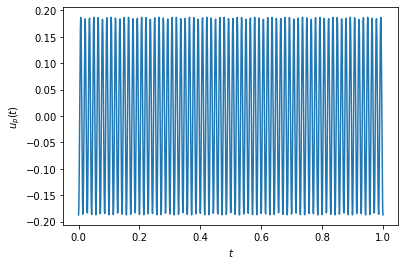

In [85]:
t = np.linspace(0,1,1000)

IDX_NODE = 2
print("Force associated with the node",Fss[IDX_NODE])
print("Displacement associated with the node",Us[IDX_NODE])

up_associated_with_force = np.real(Us[2] * np.exp(1j * w * t))

plt.figure(1)
plt.plot(t,up_associated_with_force)
plt.xlabel("$t$")
plt.ylabel("$u_{p}(t)$")

# Step 4: Convert the Uss (which is associated with f-dof) to the global dof

In [86]:
Us_global = fmn.dynamic_make_global_displacement(Us)

In [87]:
print("Us.shape",Us.shape,'--fdof')
print("U.shape",Us_global.shape,'--global-dof')

Us.shape (5,) --fdof
U.shape (9,) --global-dof


## Step 5: Post-process

## Bending moment diagram - Plot type 1

Minimum bending moment: 973.0098258177707
Maximum bending moment: 9623.350276274688


Text(0.5, 1.0, 'Bending moment (Dynamic)')

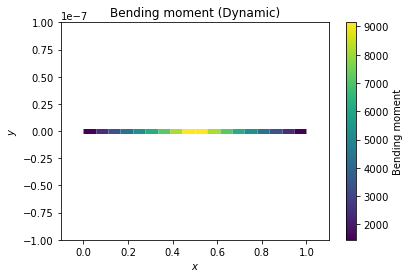

In [88]:
fmn.post_plot_bending_moment(displacement=Us_global)
plt.title("Bending moment (Dynamic)")

## Bending moment diagram - Plot type 2

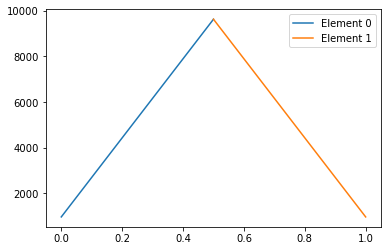

In [89]:
nelem = elemconn.shape[0]
for idx in np.arange(nelem):
    dict_moment = fmn.post_get_bending_moment(idx, npoints=10, displacement=Us_global)
    M =dict_moment["moment"]
    x = dict_moment["x_coor"]    
    plt.figure(1)
    plt.plot(x,M,label="Element {}".format(idx))
    
plt.legend()

## Displacement plot

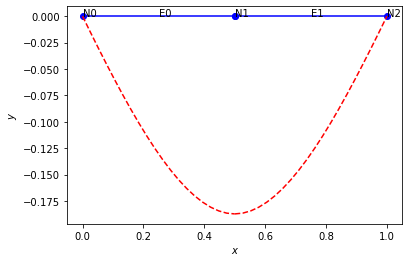

In [90]:
fmn.plot_system(displacement_vector=Us_global,show_displacement=True)

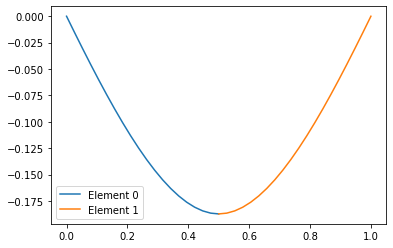

In [91]:
nelem = elemconn.shape[0]
for idx in np.arange(nelem):
    dict_moment = fmn.post_get_displacement_element(idx, npoints=20, displacement=Us_global)
    M =dict_moment["y_displ"]
    x = dict_moment["x_coor"]    
    plt.figure(1)
    plt.plot(x,M,label="Element {}".format(idx))
    
plt.legend()

## We can calculate stresses, ... from the results

# Example 2 - Rotated simply supported beam

*** WARNING: There are no forces applied to the system. Only a modal analysis can be performed. ***


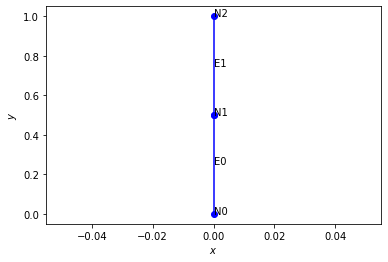

In [19]:

nodecoor = np.array([[0,0],[0,L_beam/2],[0,L_beam]])

elemconn = np.array([[0,1],[1,2]])

prescribed_displacement = []
prescribed_displacement.append(np.array([0,0,0]))
prescribed_displacement.append(np.array([0,1,0]))
prescribed_displacement.append(np.array([2,0,0]))
prescribed_displacement.append(np.array([2,1,0]))
prescribed_displacement = np.array(prescribed_displacement)

prescribed_forces = None

elemprop = {}#np.ones([elemconn.shape[0],3]) * np.array([E,I,A])
elemprop["E"] = np.ones(elemconn.shape[0]) * E
elemprop["I"] = np.ones(elemconn.shape[0]) * I
elemprop["A"] = np.ones(elemconn.shape[0]) * A
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_forces,elemprop)

fmn.plot_system()



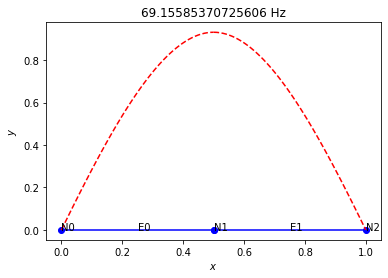

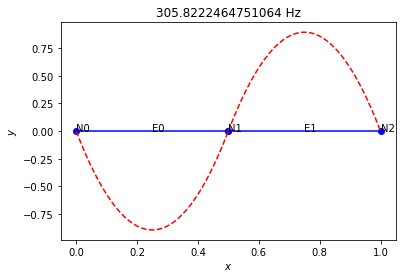

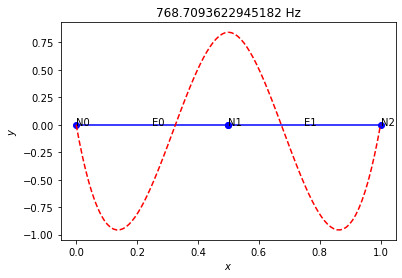

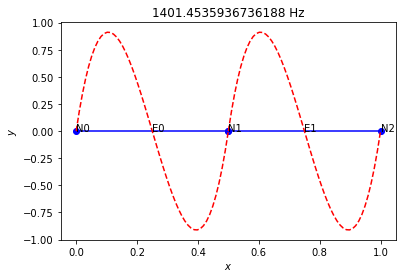

In [93]:
fmn.plot_modes(npoints=50,number_of_modes=4)

# Example 3

*** WARNING: There are no forces applied to the system. Only a modal analysis can be performed. ***


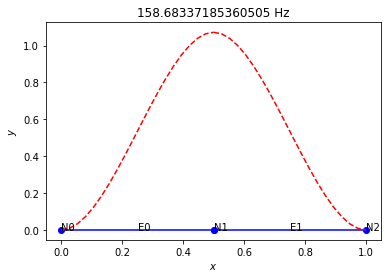

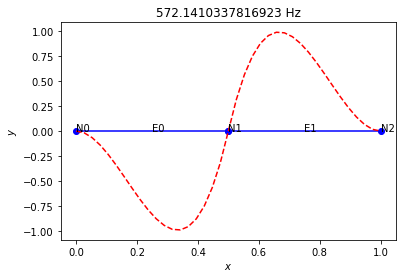

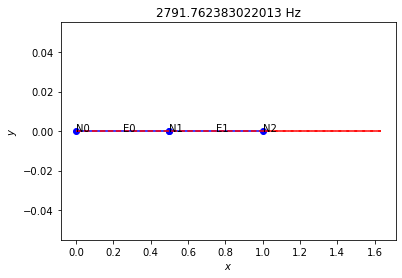

In [94]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 0, in the 2 direction (rotation-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,2,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Prescribed displacement applied to Node 0, in the 2 direction (rotation-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,2,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

F = 1000
# Initialise the prescribed force as an empty list:
prescribed_forces = None

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties

fmn.plot_modes()

# Truss analysis - Example

                     Node 0                     
u_x: -0.015000 x 10^-3, u_y: 0.057426 x 10^-3, F_x: 0.000000, F_y: 10000.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 10000.000000, F_y: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -10000.000000, F_y: -10000.000000

                     Element 0                     
stress: 1.000000 x 10^6, strain: 0.000005
                     Element 1                     
stress: -1.414214 x 10^6, strain: -0.000007


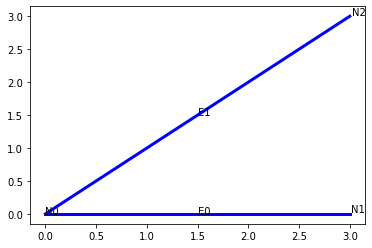

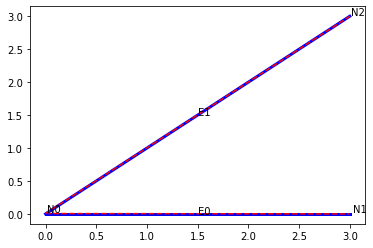

In [95]:

nodecoor = np.array([[0,0],[3,0],[3,3]])

elemconn = np.array([[0,1],[0,2]])

prescribed_displacement = []
prescribed_displacement.append(np.array([1,0,0]))
prescribed_displacement.append(np.array([1,1,0]))
prescribed_displacement.append(np.array([2,0,0]))
prescribed_displacement.append(np.array([2,1,0]))
prescribed_displacement = np.array(prescribed_displacement)

prescribed_forces = []
prescribed_forces.append(np.array([0,1,10000]))
prescribed_forces = np.array(prescribed_forces)

h = 0.1
A = h**2
E = 200E9
I = 1/12 * h**4

elemprop = {}#np.ones([elemconn.shape[0],3]) * np.array([E,I,A])
elemprop["E"] = np.ones(elemconn.shape[0]) * E
elemprop["I"] = np.ones(elemconn.shape[0]) * I
elemprop["A"] = np.ones(elemconn.shape[0]) * A
elemprop["density"] = np.ones(elemconn.shape[0]) * rho


fmn1 = sfem.FEM_Truss_2D(nodecoor,elemconn,prescribed_displacement,prescribed_forces,elemprop)

fmn1.solve()

fmn1.plot_system()

fmn1.plot_system(show_displacement=True,magnification=100)

fmn1.post_print_solution()

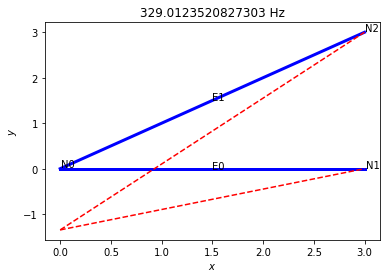

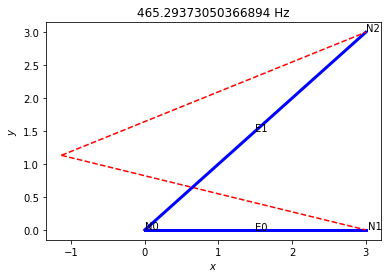

In [96]:
fmn1.plot_modes(magnification=10)

# Example 3 - Frame structure

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.000675, F_x: -749.958336, F_y: -5000.000000, M_z: 0.000000
                     Node 1                     
u_x: -0.000562 x 10^-3, u_y: 0.007500 x 10^-3, angle: 0.001350, F_x: 0.000000, F_y: 0.000000, M_z: 0.000000
                     Node 2                     
u_x: -0.000000 x 10^-3, u_y: 1.863834 x 10^-3, angle: -0.000000, F_x: 0.000000, F_y: 10000.000000, M_z: 0.000000
                     Node 3                     
u_x: 0.000562 x 10^-3, u_y: 0.007500 x 10^-3, angle: -0.001350, F_x: 0.000000, F_y: 0.000000, M_z: 0.000000
                     Node 4                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.000675, F_x: 749.958336, F_y: -5000.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Norm

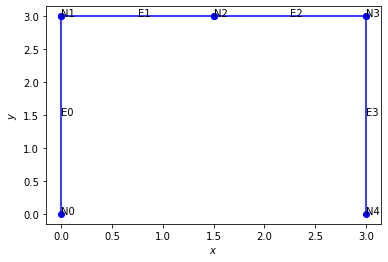

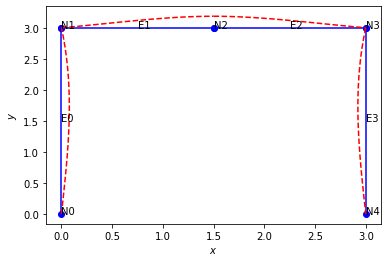

In [97]:

nodecoor = np.array([[0,0],[0,3],[1.5,3],[3,3],[3,0]])

elemconn = np.array([[0,1],[1,2],[2,3],[3,4]])

prescribed_displacement = []
prescribed_displacement.append(np.array([0,0,0]))
prescribed_displacement.append(np.array([0,1,0]))
prescribed_displacement.append(np.array([4,0,0]))
prescribed_displacement.append(np.array([4,1,0]))
prescribed_displacement = np.array(prescribed_displacement)

prescribed_forces = []
prescribed_forces.append(np.array([2,1,10000]))
prescribed_forces = np.array(prescribed_forces)

h = 0.1
A = h**2
E = 200E9
I = 1/12 * h**4

elemprop = {}#np.ones([elemconn.shape[0],3]) * np.array([E,I,A])
elemprop["E"] = np.ones(elemconn.shape[0]) * E
elemprop["I"] = np.ones(elemconn.shape[0]) * I
elemprop["A"] = np.ones(elemconn.shape[0]) * A
elemprop["density"] = np.ones(elemconn.shape[0]) * rho


fmn1 = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_forces,elemprop)

fmn1.solve()

fmn1.plot_system()

fmn1.plot_system(show_displacement=True,magnification=100)

fmn1.post_print_solution()

Minimum bending moment: -5250.124993055944
Maximum bending moment: 2249.87500694406


Text(0.5, 1.0, 'Bending moment (Static)')

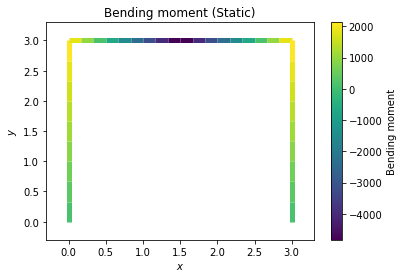

In [98]:
fmn1.post_plot_bending_moment(displacement=None)
plt.title("Bending moment (Static)")

Plot the modes

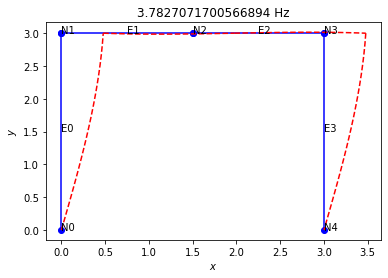

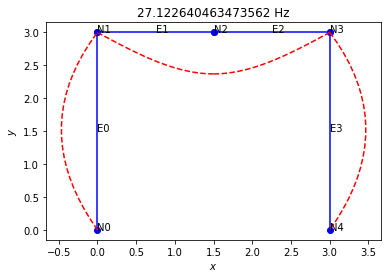

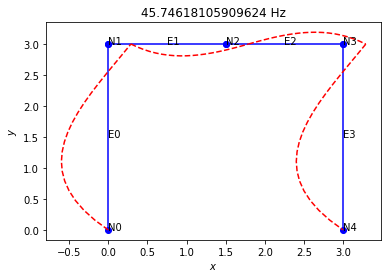

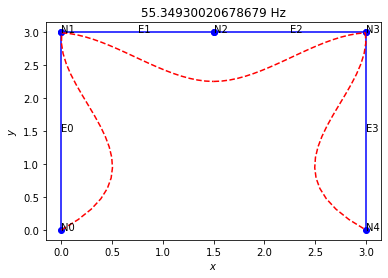

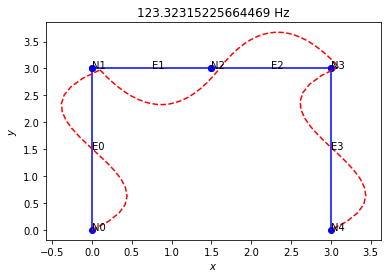

In [99]:
fmn1.plot_modes(magnification=10,number_of_modes=5)

# Dynamic load analysis (Particular solution - Approximation of Steady State under Damped Conditions)


## Step 1: Obtain the stiffness and mass matrices 

Decompose the global stiffness and mass matrices into their free-free representation:
$$
K_{ff}
$$
$$
M_{ff}
$$

In [100]:
Mff,Kff = fmn1.dynamic_make_matrices()

In [101]:
Mff.shape

(11, 11)

In [102]:
Kff.shape

(11, 11)

## Step 2: Obtain the force vector associated with the free-dof and define the frequency of the force

We want to apply the following force:
$$
f(t) = F_{2,y} \cdot cos(\omega t) 
$$
to node $2$ in the vertical direction.

Use $F_{2,y} = 10$kN and $\omega = 10$ rad/s.

We are interested in $f_{f}$ 

```python

Signature: fmn1.make_force_global(node, direction, force_magnitude)
Docstring:
inputs
-------

node: integer
    The node where the foce will be applied.

direction: integer
    The direction in which the force will be applied.

force_magnitude: integer
    The magnitude of the force.

Returns
---------

F: array_like
    The global force array that has the same dimensions as the global degrees-of-freedom of the structure

Ff: array_like
    The force associated with the free degrees-of-freedom. This is used in dynamic analyses.

Fp: array_like
    The force associated with prescribed degrees-of-freedom. This contains the reaction forces.
File:      c:\university\courses\educode\engmod\structfem.py
Type:      method


```

## A single excitation force

In [103]:
# Assume that only the load is applied to the structure (th)
_,F_free,_ = fmn1.make_force_global(2,1,10000)

F_free

array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
           0.,     0.,     0.])

## Two excitation forces

In [104]:
# Assume that only the load is applied to the structure (th)
_,F_free0,_ = fmn1.make_force_global(2,1,10000)
_,F_free1,_ = fmn1.make_force_global(1,1,10000)

F_free = F_free0 + F_free1

print(F_free)

[    0.     0. 10000.     0.     0. 10000.     0.     0.     0.     0.
     0.]


## Define the excitation frequency

In [105]:
w = 10 # rad/s

## Step 3: Obtain the particular solution for the problem

In [106]:
Uss = np.linalg.solve(Kff - Mff*w**2,F_free)

## Step 4: The particular solution only correspond to the f-dof. Place the f-dof solution into the global degree-of-freedom system

In [107]:
U = fmn1.dynamic_make_global_displacement(Uss)

In [108]:
print("Uss.shape",Uss.shape,'--fdof')
print("U.shape",U.shape,'--global-dof')

Uss.shape (11,) --fdof
U.shape (15,) --global-dof


## Step 5: Use the global displacement to calculate the bending moments, stresses, etc.

Minimum bending moment: -5262.210890830354
Maximum bending moment: 2257.402470630399


Text(0.5, 1.0, 'Bending moment (Dynamic)')

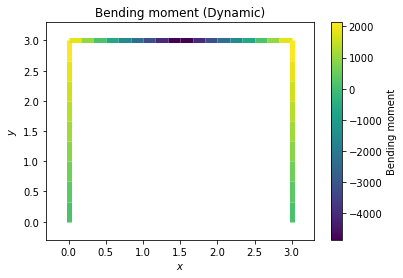

In [109]:
fmn1.post_plot_bending_moment(displacement=U)
plt.title("Bending moment (Dynamic)")

## Plot the bending moments associated with the top of the beam

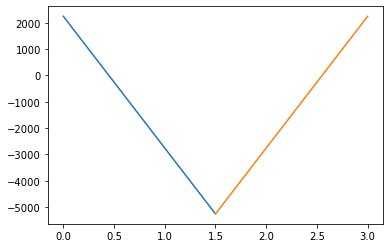

In [110]:
for idx in range(1,3):
    dict_moment = fmn1.post_get_bending_moment(idx, npoints=100, displacement=U)
    M =dict_moment["moment"]
    x = dict_moment["x_coor"]    
    plt.figure(1)
    plt.plot(x,M,label="Element {}".format(idx))

# Proportional damping

This can be written in the form
$$
C_{ff} = \alpha \cdot K_{ff} + \beta \cdot M_{ff}
$$


Minimum bending moment: -5261.677416206171
Maximum bending moment: 2257.1717970536656


Text(0.5, 1.0, 'Bending moment (Dynamic)')

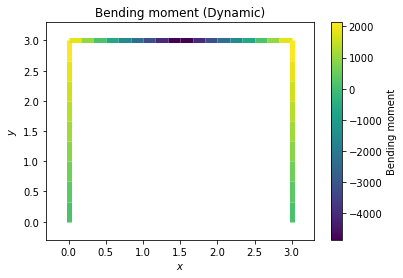

In [111]:
a = 0.001
b = 0.2

Cff = a * Kff + b * Mff

Uss = np.linalg.solve(Kff + 1j * Cff * w - Mff*w**2,F_free)

Uss = np.real(Uss)

U = fmn1.dynamic_make_global_displacement(Uss)

fmn1.post_plot_bending_moment(displacement=U)
plt.title("Bending moment (Dynamic)")
